In [ ]:
# Load packages

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cmasher as cmr

import synthesizer
from synthesizer.grid import Grid
from synthesizer.load_data.load_scsam import load_SCSAM

from synthesizer.emission_models import (
    BlackHoleEmissionModel,
    GalaxyEmissionModel,
    StellarEmissionModel,
)

from synthesizer.particle.galaxy import Galaxy as ParticleGalaxy
from synthesizer.particle.stars import Stars as ParticleStars
from synthesizer.particle import BlackHoles, Gas

from unyt import Msun, yr, Mpc, angstrom

plt.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 14})

In [2]:
# Define the grid

grid_dir = '/mnt/ceph/users/snewman/grids'
grid_name = 'qsosed-test.hdf5'
grid = Grid(grid_dir=grid_dir, grid_name=grid_name, ignore_lines=True)

print(grid)

print(grid.masses)
print(grid.accretion_rates_eddington)
print(grid.cosine_inclinations)

grid_sps_name = 'bpass-2.2.1-bin_bpl-0.1,1.0,300.0-1.3,2.35.hdf5'
grid_sps = Grid(grid_dir=grid_dir, grid_name=grid_sps_name, ignore_lines=True)

print(grid_sps)

new_lams = np.logspace(-2, 5, 10000) * angstrom

print("The old grid had dimensions:", grid.spectra["incident"].shape)

# Get the grid interpolated onto the new wavelength array
grid.interp_spectra(new_lam=new_lams)
grid_sps.interp_spectra(new_lam=new_lams)


+-----------------------------------------------------------------------------------------+
|                                          GRID                                           |
+-----------------------------+-----------------------------------------------------------+
| Attribute                   | Value                                                     |
+-----------------------------+-----------------------------------------------------------+
| grid_dir                    | '/mnt/ceph/users/snewman/grids'                           |
+-----------------------------+-----------------------------------------------------------+
| grid_name                   | 'qsosed-test'                                             |
+-----------------------------+-----------------------------------------------------------+
| grid_ext                    | 'hdf5'                                                    |
+-----------------------------+-------------------------------------------------

/mnt/home/snewman/myenv/lib/python3.12/site-packages/spectres/spectral_resampling.py:104: RuntimeWarning: Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (by default 0).
  warnings.warn(


[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.95281416e-27 2.95281416e-27 2.95281416e-27 ... 3.20709124e-18
 3.20709124e-18 3.20709124e-18] erg/(Hz*s)
[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.87706119e-27 2.87706119e-27 2.87706119e-27 ... 9.23458208e-18
 9.23458208e-18 9.23458208e-18] erg/(Hz*s)


Text(0.5, 0, 'mass (kg)')

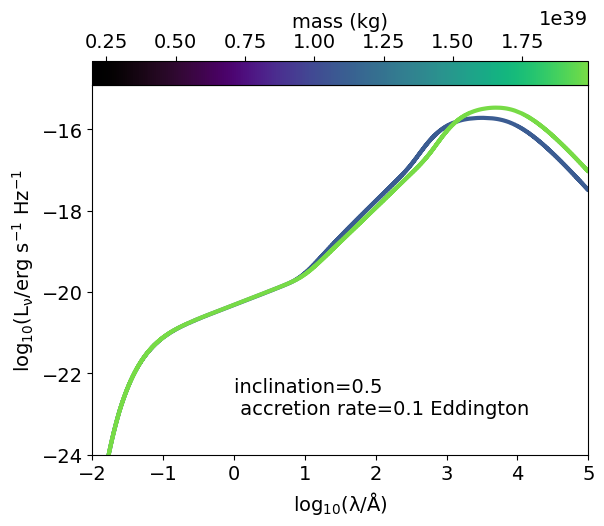

In [8]:
masses = grid.masses
accretion_rate = grid.accretion_rates_eddington[0]
inclination = grid.cosine_inclinations[1]

cmap = cmr.lavender

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(masses), vmax=max(masses))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#for each inc:
m = 0
for mass in masses: 
    m = m + 1
    grid_point = grid.get_grid_point(masses=mass, accretion_rates_eddington=accretion_rate, cosine_inclinations=inclination)
    # get Sed object
    sed = grid.get_sed_at_grid_point(grid_point, spectra_type="incident")
    print(sed.lam)
    print(sed.lnu)

    ax.plot(np.log10(sed.lam), np.log10(sed.lnu), 
                lw=3, 
                label=f'mass = {mass}',
                color = cmap(m/len(masses)))

plt.xlim(left=-2, right=5)
plt.ylim(bottom=-24)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}$')
plt.text(s='inclination=0.5 \n accretion rate=0.1 Eddington',x=0,y=-23)

# Create colorbar axis
left = 0.125
bottom = 0.8
width = 0.775
height = 0.08
cax = fig.add_axes([left, bottom + height, width, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position("top")
cax.set_xlabel(r"mass (kg)")

[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.95281416e-27 2.95281416e-27 2.95281416e-27 ... 3.20709124e-18
 3.20709124e-18 3.20709124e-18] erg/(Hz*s)
[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.84646696e-27 2.84646696e-27 2.84646696e-27 ... 2.03316804e-18
 2.03316804e-18 2.03316804e-18] erg/(Hz*s)


Text(0.5, 0, 'accretion rate (Eddington)')

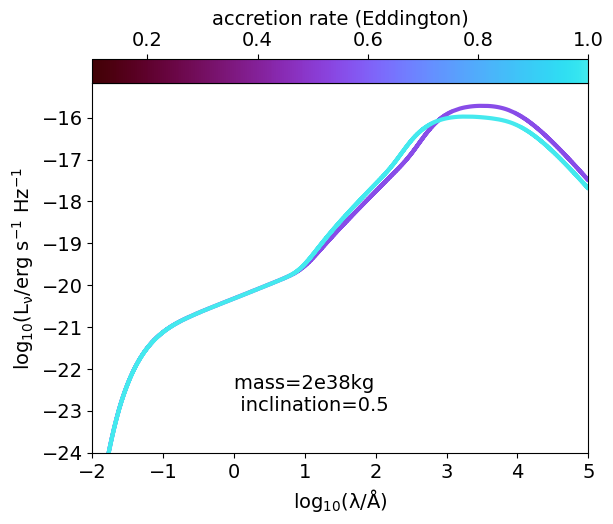

In [9]:
mass = grid.masses[0]
accretion_rates = grid.accretion_rates_eddington
inclination = grid.cosine_inclinations[1]

cmap = cmr.gem

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(accretion_rates), vmax=max(accretion_rates))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#for each inc:
m = 0
for rate in accretion_rates: 
    m = m + 1
    grid_point = grid.get_grid_point(masses=mass, accretion_rates_eddington=rate, cosine_inclinations=inclination)
    # get Sed object
    sed = grid.get_sed_at_grid_point(grid_point, spectra_type="incident")
    print(sed.lam)
    print(sed.lnu)

    ax.plot(np.log10(sed.lam), np.log10(sed.lnu), 
                lw=3, 
                color = cmap(m/len(accretion_rates)))

plt.xlim(left=-2, right=5)
plt.ylim(bottom=-24)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}$')
plt.text(s='mass=2e38kg \n inclination=0.5',x=0,y=-23)

# Create colorbar axis
left = 0.125
bottom = 0.8
width = 0.775
height = 0.08
cax = fig.add_axes([left, bottom + height, width, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position("top")
cax.set_xlabel(r"accretion rate (Eddington)")

[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.95281416e-27 2.95281416e-27 2.95281416e-27 ... 5.77295714e-19
 5.77295714e-19 5.77295714e-19] erg/(Hz*s)
[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.95281416e-27 2.95281416e-27 2.95281416e-27 ... 3.20709124e-18
 3.20709124e-18 3.20709124e-18] erg/(Hz*s)
[1.00000000e-02 1.00161327e-02 1.00322914e-02 ... 9.96781250e+04
 9.98389328e+04 1.00000000e+05] Å
[2.95281416e-27 2.95281416e-27 2.95281416e-27 ... 6.28587624e-18
 6.28587624e-18 6.28587624e-18] erg/(Hz*s)


Text(0.5, 0, 'cosine inclination')

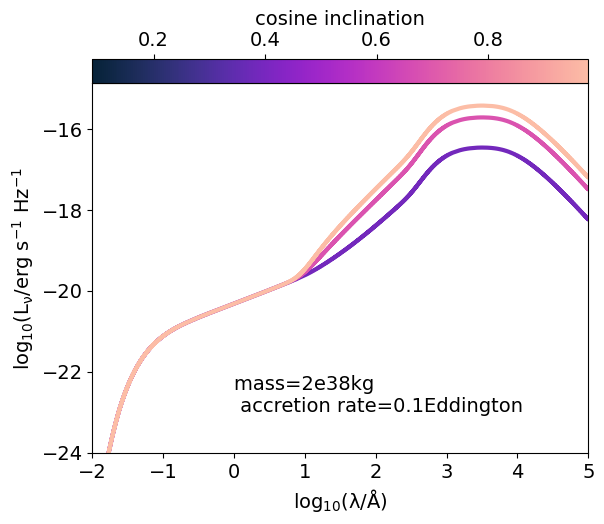

In [10]:
mass = grid.masses[0]
accretion_rate = grid.accretion_rates_eddington[0]
inclinations = grid.cosine_inclinations

cmap = cmr.bubblegum

fig, ax = plt.subplots()
norm = mpl.colors.Normalize(vmin=min(inclinations), vmax=max(inclinations))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#for each inc:
m = 0
for inc in inclinations: 
    m = m + 1
    grid_point = grid.get_grid_point(masses=mass, accretion_rates_eddington=accretion_rate, cosine_inclinations=inc)
    # get Sed object
    sed = grid.get_sed_at_grid_point(grid_point, spectra_type="incident")
    print(sed.lam)
    print(sed.lnu)

    ax.plot(np.log10(sed.lam), np.log10(sed.lnu), 
                lw=3, 
                color = cmap(m/len(inclinations)))

plt.xlim(left=-2, right=5)
plt.ylim(bottom=-24)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1}$')
plt.text(s='mass=2e38kg \n accretion rate=0.1Eddington',x=0,y=-23)

# Create colorbar axis
left = 0.125
bottom = 0.8
width = 0.775
height = 0.08
cax = fig.add_axes([left, bottom + height, width, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.tick_top()
cax.xaxis.set_label_position("top")
cax.set_xlabel(r"cosine inclination")

In [12]:
# Load data from SC-SAM

subvolumes = [
    "0_0_0",
    "0_0_1",
    "0_1_0",
    "0_1_1",
    "1_0_0",
    "1_0_1",
    "1_1_0",
    "1_1_1"
]

subvolumes = ["0_0_0"]

sam_dir = '/mnt/ceph/users/lperez/AGNmodelingSCSAM/sam_newAGNcode_forestmgmt_fidSAM'

bh_mass = []
bh_mdot = []
bh_pos = []

redshift = []
sfh = []
z_hist = []
sfh_t_bins = []

with h5py.File(f'{sam_dir}/volume.hdf5', 'r') as file:

    for subvol in subvolumes:

        # Black hole properties in subvolume
        bh_mass_subvol = file[f'{subvol}/Galprop/GalpropMBH'][:]   # 1e9 Msun
        bh_mdot_subvol = file[f'{subvol}/Galprop/GalpropMaccdot_bright'][:] # Msun/yr
        bh_pos_subvol = file[f'{subvol}/Galprop/GalpropPos'][:]             # ckpc/h
        redshift_subvol = file[f'{subvol}/Galprop/GalpropRedshift'][:]

        # Star properties
        #stellar_mass = file[f'{subvol}/Galprop/GalpropMstar'][:]
        #stellar_Z = file[f'{subvol}/Galprop/GalpropZstar'][:]

        # SFH properties 
        sfh.append(file[f'{subvol}/Histprop/HistpropSFH'][:]) # Msun
        z_hist.append(file[f'{subvol}/Histprop/HistpropZt'][:]) # Zsun
        
        #birth_halo_ID = file[f'{subvol}/Linkprop/LinkpropBirthHaloID'][:] 
        #halo_index = file[f'{subvol}/Linkprop/LinkpropHaloIndex'][:] 
        #to_gal_prop_snapshot = file[f'{subvol}/Linkprop/LinkproptoGalprop_Snapshot'][:]

        # For each SFH age bin, get the corresponding BH properties from Galprop
        redshift.append(file[f'{subvol}/Linkprop/LinkpropRedshift'][:]) # same as from Galprop
        to_gal_prop = file[f'{subvol}/Linkprop/LinkproptoGalprop'][:]
        for i in to_gal_prop:
            bh_mass.append(bh_mass_subvol[i])
            bh_mdot.append(bh_mdot_subvol[i])
            bh_pos.append(bh_pos_subvol[i])

    sfh_t_bins = file[f'{subvol}/Header/SFH_tbins'][:]

    # Combine all subvolumes
    sfh = np.vstack(sfh)
    z_hist = np.concatenate(z_hist)
    redshift = np.concatenate(redshift)


In [13]:
print(len(sfh_t_bins))
print(len(sfh))
print(len(redshift))
print(len(bh_mass  ))

1405
141636
141636
141636


In [14]:
def load_SCSAM_particle_galaxy(SFH, age_lst, Z_hist, bh_mass, bh_mdot, z, verbose=False):
    """Treat each age bin as a particle, using metallicity history."""

    # First load SFH data

    p_imass = []  # initial mass
    p_age = []    # age
    p_Z = []      # metallicity

    age_len = len(age_lst)

    if verbose:
        print("Iterating through SFH bins...")

    for age_ind in range(age_len):
        # Check if all SFH values in the slice are zero
        if (SFH[age_ind] == 0).all():
            continue
        p_imass.append(SFH[age_ind])       # 10^9 Msun
        p_age.append(age_lst[age_ind])     # Gyr
        p_Z.append(Z_hist[age_ind])        # unitless (Zsun)

    # Convert units
    p_imass = np.array(p_imass) * 1e9  # Msun
    p_age = np.array(p_age) * 1e9      # yr
    p_Z = np.array(p_Z)

    # Create stars object
    stars = ParticleStars(
        initial_masses=p_imass * Msun, ages=p_age * yr, metallicities=p_Z
    )

    print('nstars = ', len(p_imass))

    # Add black hole properties

    black_holes=BlackHoles(
            masses=np.array([bh_mass]) * 1e9 * Msun,
            accretion_rates=np.array([bh_mdot]) * Msun/yr,
            #coordinates=bh_pos * Mpc,
            redshift=np.array([z])
        )
    
    # Add gas properties 

    # Build galaxy
    return ParticleGalaxy(stars=stars,
                          black_holes=black_holes)

In [15]:
# Make trial galaxy with stars and BHs

print(len(sfh))
print(len(sfh[0]))

for i in range(10):
    print(sfh[i])

gal = load_SCSAM_particle_galaxy(SFH=sfh[0],
                                 age_lst=sfh_t_bins,
                                 Z_hist=z_hist[0],
                                 bh_mass=bh_mass[0],
                                 bh_mdot=bh_mdot[0],
                                 #bh_pos=bh_pos[0],
                                 z=redshift[0],
                                 verbose=True)

print(gal)

141636
1405
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Iterating through SFH bins...
nstars =  1009
+-------------------------------------------------------------------------------------+
|                                       GALAXY                                        |
+-------------+-----------------------------------------------------------------------+
| Attribute   | Value                                                                 |
+-------------+-----------------------------------------------------------------------+
| galaxy_type | 'Particle'                                                            |
+-------------+-----------------------------------------------------------------------+
| stars       | <synthesizer.particle.stars.Stars object at 0x1554fd068da0>           |

/tmp/ipykernel_2059612/90139638.py:47: RuntimeWarning: 
Current mass of stars not provided, setting stellar_mass_weighted_age to
`None`
  return ParticleGalaxy(stars=stars,
/mnt/home/snewman/myenv/lib/python3.12/site-packages/synthesizer/utils/ascii_table.py:65: FutureWarning: The `photo_fluxes` attribute is deprecated. Use `photo_fnu` instead. Will be removed in v1.0.0
  self.attributes[name] = getattr(obj, name)
/mnt/home/snewman/myenv/lib/python3.12/site-packages/synthesizer/utils/ascii_table.py:65: FutureWarning: The `photo_luminosities` attribute is deprecated. Use `photo_lnu` instead. Will be removed in v1.0.0
  self.attributes[name] = getattr(obj, name)


nstars =  1234
nstars =  1043
nstars =  1227
nstars =  1310
nstars =  1026
nstars =  1184


/tmp/ipykernel_2059612/90139638.py:47: RuntimeWarning: 
Current mass of stars not provided, setting stellar_mass_weighted_age to
`None`
  return ParticleGalaxy(stars=stars,


nstars =  1273
nstars =  1201
nstars =  1252
nstars =  1103


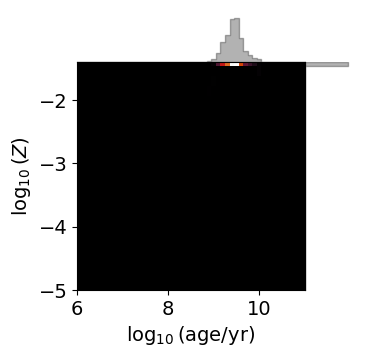

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\log_{10}(\\mathrm{age}/\\mathrm{yr})$', ylabel='$\\log_{10}(Z)$'>)

In [28]:
# How many galaxies to load
N = 10

# Load galaxies with particle method

# Random indices from n galaxies
indices = np.random.choice(len(bh_mass), size=N, replace=False)

gals = []
seds = []

for i in indices:

    gal = load_SCSAM_particle_galaxy(SFH=sfh[i],
                                    age_lst=sfh_t_bins,
                                    Z_hist=z_hist[i],
                                    bh_mass=bh_mass[i],
                                    bh_mdot=bh_mdot[i],
                                    #bh_pos=bh_pos[0],
                                    z=redshift[i],
                                    verbose=False)
    
    gals.append(gal)

    # Extract SED

    # Define emission model 
    
    stellar_incident = StellarEmissionModel(
    "stellar_incident",
    grid=grid_sps,
    extract="incident",
    fesc=0.3,
    )

    agn_incident = BlackHoleEmissionModel(
        "agn_incident",
        grid=grid,
        extract="incident",
        fesc=0.3,
    )

    combined_emission = GalaxyEmissionModel(
        "total",
        combine=(stellar_incident, agn_incident)
    )

    #combined_emission.set_per_particle(True)
    #combined_emission.plot_emission_tree()

    spectra_type = "total"  # could be "incident", "nebular", "intrinsic", etc.
    
    gal.get_spectra(combined_emission, verbose=True)
    sed = gal.spectra[spectra_type]
    seds.append((sed.lam, sed.lnu))

# Plot SFZH for the last galaxy
gal.stars.get_sfzh(log10ages=grid_sps.log10ages, log10metallicities=grid_sps.log10metallicities)
gal.stars.plot_sfzh()

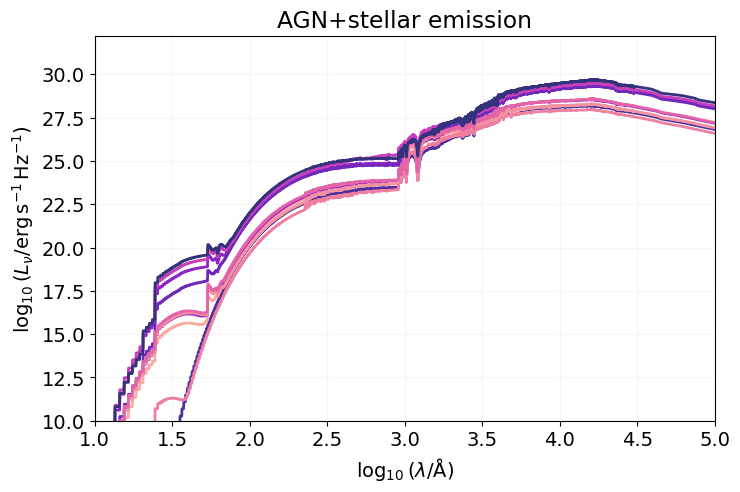

In [25]:
# Plot SEDs

# Choose a cmasher colormap, e.g., "cmr.rainforest"
cmap = cmr.get_sub_cmap("cmr.bubblegum", 0.05, 0.95)  # full range of the colormap

# Particle SEDs plotting
plt.figure(figsize=(8, 5))

for lam, lnu in seds:
    color = cmap(np.random.rand())  # pick a random color from the colormap
    plt.plot(np.log10(lam), np.log10(lnu), color=color, lw=2)

plt.xlabel(r"$\log_{10}(\lambda/\rm{\AA})$")
plt.ylabel(r"$\log_{10}(L_\nu/\rm{erg\,s^{-1}\,Hz^{-1}})$")
plt.xlim(left=1, right=5)
plt.ylim(bottom=10)
plt.title('AGN+stellar emission')
plt.grid(color="whitesmoke")
plt.show()

In [23]:
print(gals[0].black_holes.accretion_rates)
print(gals[0].black_holes.masses)

[0.] Msun/yr
[10020.] Msun
